# 4_EURES_CH_Pandas_Plotten

<font color='red'>In diesem Notebook werden die klassifizierten Daten (abgespeichert unter Data_jobCodes10_17022019.csv) mit Hilfe von Pandas visualisiert und als File abgespeichert.</font>

### Schritt 1: Daten laden

In [1]:
import pandas as pd

path = "Data_jobCodes10_17022019.csv"

with open(path) as f:
    dateiinhalt = f.read()

df_10 = pd.read_csv(path)

### Schritt 2: Datenstruktur überpüfen

In [2]:
df_10.shape

(4831, 12)

In [3]:
df_10.dtypes

id                       object
creationDate              int64
lastModificationDate      int64
title                    object
description              object
numberOfPosts             int64
locationMap              object
euresFlag                  bool
jobCategoriesCodes       object
employer                 object
score                   float64
jobCodes10                int64
dtype: object

In [4]:
df_10['numberOfPosts'].value_counts().sort_index()

1     4052
2      132
3      170
4      150
5      208
6       14
7        8
8        9
9        3
10      70
11       2
12       4
15       5
20       1
30       2
40       1
Name: numberOfPosts, dtype: int64

In [5]:
df_10['jobCodes10'].value_counts().sort_index()

1     161
2     920
3     737
4     136
5     269
6      91
7    2131
8     309
9      77
Name: jobCodes10, dtype: int64

### Schritt 3: Datenauswertung

In [6]:
df_10.groupby('jobCodes10').sum()

,creationDate,lastModificationDate,numberOfPosts,euresFlag,score
jobCodes10,,,,,
1,249151149902520,249271677785726,181,0.0,0.0
2,1423545655238310,1424136563680160,1098,0.0,0.0
3,1139929182762825,1141324938406915,1157,3.0,0.0
4,210537043927174,210606928497577,145,0.0,0.0
5,416210595237416,416437079875007,373,1.0,0.0
6,140644076798096,140944782967567,147,0.0,0.0
7,3293397142506675,3300852550142492,3875,5.0,0.0
8,477558465868850,478587086221673,518,0.0,0.0
9,119072198034248,119246883203466,176,1.0,0.0


Was bedeuten die Codes 0-9 gemäss ISCO auf Deutsch? Siehe dazu: https://www.bfs.admin.ch/bfs/de/home/statistiken/arbeit-erwerb/nomenclaturen/isco-08.assetdetail.4082534.html 

0 Armed forces occupations = Angehörige der regulären Streitkräfte    
1 Managers = Führungskräfte    
2 Professionals = Akademische Berufe (u.a. Ärzte, Informatiker,...)  
3 Technicians and associate professionals = Techniker und gleichrangige nichttechnische Berufe  
4 Clerical support workers = Bürokräfte und verwandte Berufe  
5 Service and sales workers = Dienstleistungsberufe und Verkäufer (u.a. Köche, )  
6 Skilled agricultural, forestry and fishery workers = Fachkräfte in Land- und Forstwirtschaft und Fischerei  
7 Craft and related trades workers = Handwerks- und verwandte Berufe  
8 Plant and machine operators and assemblers = Bediener von Anlagen und Maschinen und Montageberufe  
9 Elementary occupations = Hilfsarbeitskräfte  


**TEST:** Kann das Resultat stimmen? Ja, denn werden alle Spalten summiert ergibt dies die 7'6700 Inserate aus dem Notebook `3_EURES_CH_Daten_reinigen`.

In [7]:
df_10.groupby('jobCodes10').sum().sum()

creationDate            7.470046e+15
lastModificationDate    7.481408e+15
numberOfPosts           7.670000e+03
euresFlag               1.000000e+01
score                   0.000000e+00
dtype: float64

In [8]:
df_10[df_10['jobCodes10'] == 9].sum()

id                      MDgzUVZCUSA5MDgyWlBNWSA5MDgzR1hQRyA5MTAwMDAtMT...
creationDate                                              119072198034248
lastModificationDate                                      119246883203466
title                   Aide de cuisine plongeur H/FAide-maçon / Aide-...
description             Hôtel familial à la montagne dans le Valais su...
numberOfPosts                                                         176
locationMap             {'CH': [None]}{'CH': [None]}{'CH': [None]}{'CH...
euresFlag                                                            True
jobCategoriesCodes      ['http://data.europa.eu/esco/isco/C9412']['htt...
employer                {'name': 'hotel du glacier', 'website': 'http:...
score                                                                   0
jobCodes10                                                            693
dtype: object

Des Resultat als neues Dataframe abspeichern.

In [9]:
df_final = df_10.groupby('jobCodes10').sum()
df_final

,creationDate,lastModificationDate,numberOfPosts,euresFlag,score
jobCodes10,,,,,
1,249151149902520,249271677785726,181,0.0,0.0
2,1423545655238310,1424136563680160,1098,0.0,0.0
3,1139929182762825,1141324938406915,1157,3.0,0.0
4,210537043927174,210606928497577,145,0.0,0.0
5,416210595237416,416437079875007,373,1.0,0.0
6,140644076798096,140944782967567,147,0.0,0.0
7,3293397142506675,3300852550142492,3875,5.0,0.0
8,477558465868850,478587086221673,518,0.0,0.0
9,119072198034248,119246883203466,176,1.0,0.0


### Schritt 4: Chart zeichnen

In [10]:
%matplotlib inline

Text(0.5, 1.0, 'Anzahl Jobinserate pro Branche')

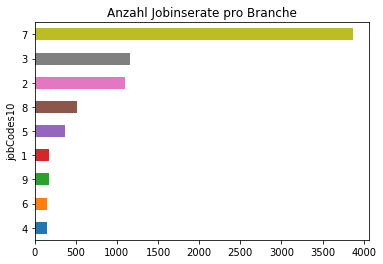

In [11]:
df_final['numberOfPosts'].sort_values().plot(kind = 'barh').set_title("Anzahl Jobinserate pro Branche")

### Schritt 5: Index umbenennen

In [21]:
df_10.dtypes

id                       object
creationDate              int64
lastModificationDate      int64
title                    object
description              object
numberOfPosts             int64
locationMap              object
euresFlag                  bool
jobCategoriesCodes       object
employer                 object
score                   float64
jobCodes10                int64
dtype: object

In [25]:
jobCodes10_dt = {
    1: "Führungskräfte",    
    2: "Akademische Berufe", 
    3: "Techniker und gleichrangige nichttechnische Berufe",  
    4: "Bürokräfte und verwandte Berufe",  
    5: "Dienstleistungsberufe und Verkäufer",  
    6: "Fachkräfte in Land- und Forstwirtschaft und Fischerei",  
    7: "Handwerks- und verwandte Berufe",  
    8: "Bediener von Anlagen und Maschinen und Montageberufe",  
    9: "Hilfsarbeitskräfte"
}

In [26]:
df_10['jobCodes10'].replace(jobCodes10_dt, inplace=True)

In [28]:
df_final = df_10.groupby('jobCodes10').sum()
df_final

,creationDate,lastModificationDate,numberOfPosts,euresFlag,score
jobCodes10,,,,,
Akademische Berufe,1423545655238310,1424136563680160,1098,0.0,0.0
Bediener von Anlagen und Maschinen und Montageberufe,477558465868850,478587086221673,518,0.0,0.0
Bürokräfte und verwandte Berufe,210537043927174,210606928497577,145,0.0,0.0
Dienstleistungsberufe und Verkäufer,416210595237416,416437079875007,373,1.0,0.0
Fachkräfte in Land- und Forstwirtschaft und Fischerei,140644076798096,140944782967567,147,0.0,0.0
Führungskräfte,249151149902520,249271677785726,181,0.0,0.0
Handwerks- und verwandte Berufe,3293397142506675,3300852550142492,3875,5.0,0.0
Hilfsarbeitskräfte,119072198034248,119246883203466,176,1.0,0.0
Techniker und gleichrangige nichttechnische Berufe,1139929182762825,1141324938406915,1157,3.0,0.0


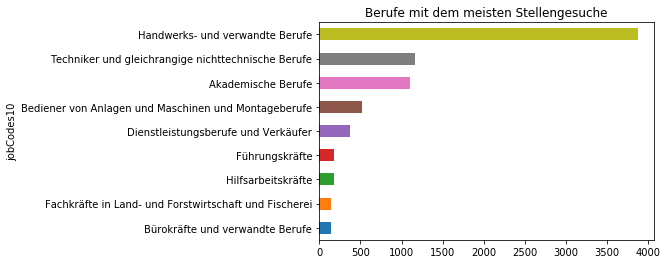

In [48]:
df_final_chart = df_final['numberOfPosts'].sort_values().plot(kind = 'barh', title='Berufe mit dem meisten Stellengesuche')

Hilfreicher Tipp auf Stackoverflow wie das Resultat angezeigt wird: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

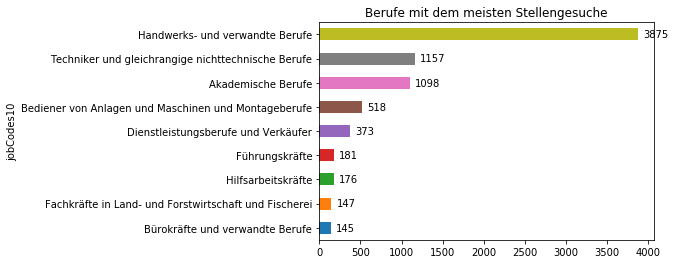

In [50]:
df_final_chart = df_final['numberOfPosts'].sort_values().plot(kind = 'barh', title='Berufe mit dem meisten Stellengesuche')

for p in df_final_chart.patches:
    df_final_chart.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

### Schritt 6: Chart abspeichern

In [51]:
fig = df_final_chart.get_figure()
fig.savefig("EURES_CH_Anzahl_Stellen_nach_Berufen.png", bbox_inches='tight')